In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import copy

In [2]:
sigm = lambda x: 1/(1+np.exp(-x))

In [3]:
class Layer:
    
    
    def __init__(self,NC,NN,ActFun,rate=0.5):
        
        self.NC = NC
        self.NN = NN
        self.ActFunc = ActFun
        self.rate = rate
        
        self.W = np.random.uniform( -0.5,0.5,(self.NC,self.NN) )
        self.b = np.random.uniform( -0.5,0.5,(1,self.NN) )
        
    def Activation(self,x):
        z = np.dot(x,self.W) + self.b
        return self.ActFunc( z )[0]
    
    def Mutate(self):
    
        #self.W += np.random.normal( loc=0., scale=self.rate, size=(self.NC,self.NN))
        #self.b += np.random.normal( loc=0., scale=self.rate, size=(1,self.NN))
        
        self.W += np.random.uniform( -self.rate, self.rate, size=(self.NC,self.NN))
        self.b += np.random.uniform( -self.rate, self.rate, size=(1,self.NN))

In [4]:
# Topologia
l0 = Layer(1,5,sigm)
l1 = Layer(5,1,sigm)
#l2 = Layer(2,1,sigm)
Brain = [l0,l1]
Brain

[<__main__.Layer at 0x7fe7742bfd00>, <__main__.Layer at 0x7fe7742bf880>]

In [5]:
def Predict(Brain,x):
    
    for i in range(len(Brain)):
        if i == 0:
            output = Brain[i].Activation(x)
        else:
            output = Brain[i].Activation(output)
    
    return output[0]

In [6]:
Predict(Brain,0.3)

0.4205279585173504

In [7]:
def Plot():

    x = np.linspace(-1,1,20)
    Act = np.zeros_like(x)

    for i in range(len(x)):

        Act[i] = Predict(Brain,x[i])

    plt.plot(x,Act)

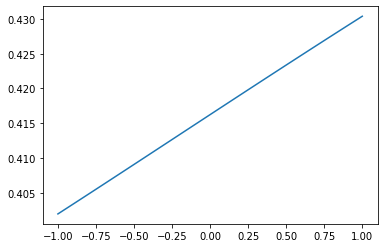

In [8]:
Plot()

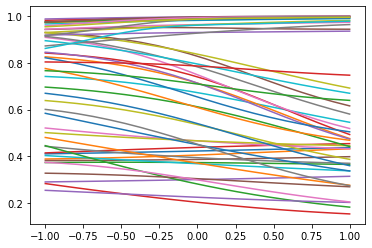

In [9]:
for j in range(50):
    Brain[0].Mutate()
    Brain[1].Mutate()
    Plot()